In [7]:
import requests
from bs4 import BeautifulSoup # pakiet do parsowania, żeby Python był świadom struktury znaczników
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [8]:
# def Scrape_US_temperatures(print_results = True):
    
#     'returns "temps" dataframe with historical average low and high temperatures for each month and each US state'
    
#     url = 'https://www.usclimatedata.com'
#     answer = requests.get(url)
#     website = answer.text
#     soup = BeautifulSoup(website, 'html.parser')
#     global temps
#     temps = []
#     states_names = []
    
#     for link in soup.findAll('a', {'class': 'stretched-link'}):
        
#         url_state = (f"{url}{link.get('href')}")
#         answer_state = requests.get(url_state)
#         website_state = answer_state.text
#         soup_state = BeautifulSoup(website_state, 'html.parser')
#         if print_results == True:
#             print(url_state)
        
#         my_table_top = []
#         my_table_bottom = []
#         td_top = []
#         td_bottom = []
# #         temps_high = []
#         temps_low = []        

#         my_table_top = soup_state.find('table')
#         td_top = my_table_top.findAll('td')

#         my_table_bottom = soup_state.find('table', {'class':'climate_table_margin_top'})
#         td_bottom = my_table_bottom.findAll('td')


#         for row in range(8, 14):
#     #         print(int(re.findall('\d+', str(td_top[row]))[0]))
#             temps_low.append(int(re.findall('\d+', str(td_top[row]))[0]))
# #         print(temps_low)

# #         for row in range(1, 7):
# #     #         print(int(re.findall('\d+', str(td_top[row]))[0]))
# #             temps_high.append(int(re.findall('\d+', str(td_top[row]))[0]))
# # #         print(temps_high)

#         for row in range(8, 14):
#     #         print(int(re.findall('\d+', str(td_bottom[row]))[0]))
#             temps_low.append(int(re.findall('\d+', str(td_bottom[row]))[0]))
#         if print_results == True:
#             print(temps_low)
        
# #         for row in range(1, 7):
# #     #         print(int(re.findall('\d+', str(td_bottom[row]))[0]))
# #             temps_high.append(int(re.findall('\d+', str(td_bottom[row]))[0]))
# #         if print_results == True:
# #             print(temps_high)


#         temps.append(temps_low)
# #         temps.append(temps_high)
        
#         states_names.append(f'''{re.findall('^.+climate/(.+)/united.+', f'{url}{link.get("href")}')[0].capitalize()}_low_t''')
# #         states_names.append(f'''{re.findall('^.+climate/(.+)/united.+', f'{url}{link.get("href")}')[0].capitalize()}_high_t''')
        
#         if print_results == True:
#             print(' ')

#     temps = pd.DataFrame(temps).T
#     temps.columns = states_names
    
#     return temps

In [9]:
def Scrape_US_temperatures(print_results = True):
    
    'returns "temps" dataframe with historical average low temperatures for each month and each US state'
    
    url = 'https://www.usclimatedata.com'
    answer = requests.get(url)
    website = answer.text
    soup = BeautifulSoup(website, 'html.parser')
    global temps
    temps = []
    states_names = []
    
    for link in soup.findAll('a', {'class': 'stretched-link'}):
        
        url_state = (f"{url}{link.get('href')}")
        answer_state = requests.get(url_state)
        website_state = answer_state.text
        soup_state = BeautifulSoup(website_state, 'html.parser')
        if print_results == True:
            print(url_state)
            
        my_table = soup_state.findAll('td', {'class':"low text-right"})
        
        temps_low = []

        for row in my_table:
            temps_low.append(int(re.findall('\d+', str(row))[0]))
            
        if print_results == True:
            print(temps_low)
            print(' ')
            
        temps.append(temps_low)
        
        states_names.append(f'''{re.findall('^.+climate/(.+)/united.+',
                            f'{url}{link.get("href")}')[0].capitalize()}_low_t''')
        
    temps = pd.DataFrame(temps).T
    temps.columns = states_names

In [10]:
Scrape_US_temperatures()

https://www.usclimatedata.com/climate/alabama/united-states/3170
[34, 37, 44, 51, 60, 68, 71, 71, 64, 53, 44, 36]
 
https://www.usclimatedata.com/climate/alaska/united-states/3171
[11, 14, 19, 29, 40, 48, 52, 50, 42, 29, 17, 13]
 
https://www.usclimatedata.com/climate/arizona/united-states/3172
[46, 49, 53, 60, 69, 78, 83, 83, 77, 65, 53, 45]
 
https://www.usclimatedata.com/climate/arkansas/united-states/3173
[32, 35, 43, 51, 61, 69, 73, 72, 65, 53, 42, 34]
 
https://www.usclimatedata.com/climate/california/united-states/3174
[39, 41, 44, 46, 51, 56, 58, 58, 56, 50, 43, 38]
 
https://www.usclimatedata.com/climate/colorado/united-states/3175
[18, 19, 27, 34, 43, 52, 59, 57, 48, 37, 25, 18]
 
https://www.usclimatedata.com/climate/connecticut/united-states/3176
[23, 25, 31, 41, 51, 60, 66, 66, 58, 47, 38, 28]
 
https://www.usclimatedata.com/climate/delaware/united-states/3177
[27, 29, 36, 44, 54, 63, 68, 67, 60, 49, 40, 31]
 
https://www.usclimatedata.com/climate/district-of-columbia/unit

In [11]:
temps

,Alabama_low_t,Alaska_low_t,Arizona_low_t,Arkansas_low_t,California_low_t,Colorado_low_t,Connecticut_low_t,Delaware_low_t,District-of-columbia_low_t,Florida_low_t,...,South-dakota_low_t,Tennessee_low_t,Texas_low_t,Utah_low_t,Vermont_low_t,Virginia_low_t,Washington_low_t,West-virginia_low_t,Wisconsin_low_t,Wyoming_low_t
0,34,11,46,32,39,18,23,27,27,39,...,0,33,42,26,10,28,37,26,16,18
1,37,14,49,35,41,19,25,29,28,42,...,5,36,45,31,13,31,37,29,19,19
2,44,19,53,43,44,27,31,36,35,47,...,19,44,51,38,22,37,39,35,28,24
3,51,29,60,51,46,34,41,44,44,52,...,32,53,59,43,35,46,42,44,37,31
4,60,40,69,61,51,43,51,54,54,62,...,45,62,67,52,45,55,47,53,47,40
5,68,48,78,69,56,52,60,63,63,69,...,55,70,72,61,55,65,52,62,57,49
6,71,52,83,73,58,59,66,68,68,72,...,60,74,74,69,60,69,56,66,64,56
7,71,50,83,72,58,57,66,67,66,72,...,57,73,75,67,58,67,56,65,63,54
8,64,42,77,65,56,48,58,60,59,68,...,46,65,69,58,51,60,52,57,55,45
9,53,29,65,53,50,37,47,49,48,57,...,33,54,61,46,39,48,46,45,43,34


In [12]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt

In [13]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# temps_rescaled = scaler.fit_transform(temps)

In [14]:
# pd.DataFrame(temps_rescaled.round(2))

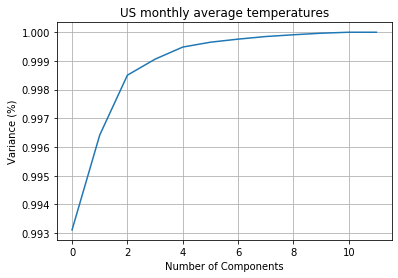

In [15]:
pca = PCA().fit(temps)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('US monthly average temperatures')
plt.grid()
plt.show()

In [16]:
pca.explained_variance_ratio_.round(2)

array([0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [17]:
pca = PCA(n_components=1)
temps_pca = pca.fit_transform(temps)

In [18]:
# pca = PCA().fit(temps_rescaled)
# #Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title('US monthly average temperatures')
# plt.grid()
# plt.show()

In [19]:
# pca.explained_variance_ratio_.round(2)

In [20]:
# pca = PCA(n_components=2)
# temps_pca = pca.fit_transform(temps_rescaled)

In [21]:
temps_pca = pd.DataFrame(temps_pca)
temps_pca.columns = ['US_temp']
temps_pca

,US_temp
0,149.463355
1,126.992186
2,75.360065
3,12.736171
4,-54.785704
5,-116.215148
6,-149.008461
7,-139.946106
8,-85.799000
9,-8.021526


Repeating dataframe and adding proper index

In [109]:
temps_pca_rep = pd.concat([temps_pca]*20, ignore_index=True)
temps_pca_rep.iloc[[0, 5, 12, 17], :]

,US_temp
0,149.463355
5,-116.215148
12,149.463355
17,-116.215148


In [110]:
temps_pca_rep.index = pd.date_range(start ='2010-01-01', 
                                    periods = 240,
                                    freq ='MS') 

In [111]:
isinstance(temps_pca_rep.index, pd.DatetimeIndex)

True

In [112]:
temps_pca_rep.head(3)

,US_temp
2010-01-01,149.463355
2010-02-01,126.992186
2010-03-01,75.360065


In [117]:
temps_pca_rep = temps_pca_rep.resample('d').ffill()
temps_pca_rep.head(50)[temps_pca_rep.head(50).index.day<4]

,US_temp
2010-01-01,149.463355
2010-01-02,149.463355
2010-01-03,149.463355
2010-02-01,126.992186
2010-02-02,126.992186
2010-02-03,126.992186


In [118]:
temps_pca_rep.to_pickle('./Data/temps_pca_rep.pkl')